# penguins_nflow stacking

Training on penguins dataset using nflow model and stacking data

In [107]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Declare real dataset and split into train/test

In [108]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()
gen_method = "nflow"
target = "species"

In [3]:
# Split penguins data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_real, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv("Data\penguins_train.csv", index=False)
penguins_test.to_csv("Data\penguins_test.csv", index=False)

In [109]:
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = penguins_real.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v1.csv", key="synth")

[2024-05-07T12:45:40.021762+0200][4904][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 1000/1000 [00:34<00:00, 29.37it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

# syn_v2

In [5]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate real and synthesized data
penguins_stack = pd.concat([penguins_real, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v1.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v1_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v1_test.csv", index=False)

In [6]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v2.csv", key="synth")

[2024-05-07T12:48:35.658730+0200][4904][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 60%|█████▉    | 599/1000 [00:31<00:21, 18.91it/s]


[{'train':     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
235  Gentoo     Biscoe              45.1             14.5              215.0   
399  Gentoo  Torgersen              53.3             21.3              229.5   
602  Adelie      Dream              32.1             19.5              190.1   
61   Adelie     Biscoe              41.1             19.1              188.0   
145  Adelie      Dream              41.5             18.5              201.0   
..      ...        ...               ...              ...                ...   
71   Adelie  Torgersen              37.2             19.4              184.0   
106  Adelie     Biscoe              39.7             17.7              193.0   
270  Gentoo     Biscoe              45.5             15.0              220.0   
435  Gentoo     Biscoe              48.4             14.0              212.8   
102  Adelie     Biscoe              38.1             17.0              181.0   

     body_mass_g     sex  
2

# syn_v3

In [7]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v2.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v2_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v2_test.csv", index=False)

In [8]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v3.csv", key="synth")

[2024-05-07T12:49:08.869877+0200][4904][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 55%|█████▍    | 549/1000 [00:49<00:40, 11.17it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1112     Gentoo     Biscoe              47.8             18.9   
966      Adelie     Biscoe              40.4             19.7   
598      Gentoo     Biscoe              48.1             14.2   
170   Chinstrap      Dream              46.7             17.9   
275      Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1095  Chinstrap     Biscoe              47.0             17.2   
1130  Chinstrap     Biscoe              38.4             17.6   
1294     Adelie  Torgersen              40.4             18.0   
860      Gentoo     Biscoe              48.2             17.5   
1126     Adelie     Biscoe              39.8             14.5   

      flipper_length_mm  body_mass_g     sex  
1112              220.4       4479.6    MALE  
966               220.0       3739.5  FEMALE  
598               214.2       5030.4    MALE  
170               19

# syn_v4

In [9]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v3.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v3_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v4.csv", key="synth")

[2024-05-07T12:50:00.324217+0200][4904][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 50%|████▉     | 499/1000 [01:19<01:19,  6.28it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1011     Adelie     Biscoe              48.0             17.1   
1273     Adelie      Dream              36.7             17.4   
69       Adelie  Torgersen              42.8             18.5   
2539  Chinstrap      Dream              42.2             19.6   
942      Gentoo     Biscoe              46.7             15.6   
...         ...        ...               ...              ...   
1638     Gentoo     Biscoe              46.8             17.0   
1095  Chinstrap     Biscoe              47.0             17.2   
1130  Chinstrap     Biscoe              38.4             17.6   
1294     Adelie  Torgersen              40.4             18.0   
860      Gentoo     Biscoe              48.2             17.5   

      flipper_length_mm  body_mass_g     sex  
1011              217.0       4735.1    MALE  
1273              187.1       3210.0  FEMALE  
69                195.0       4250.0    MALE  
2539              21

# syn_v5

In [11]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v4.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v4_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v5.csv", key="synth")

[2024-05-07T12:51:23.823154+0200][4904][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 65%|██████▍   | 649/1000 [03:29<01:53,  3.10it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
5054     Adelie     Biscoe              39.0             18.3   
120      Adelie  Torgersen              38.8             17.6   
2351     Adelie     Biscoe              46.3             18.6   
1907     Adelie      Dream              42.0             18.1   
3648  Chinstrap      Dream              47.5             18.4   
...         ...        ...               ...              ...   
3092     Gentoo     Biscoe              43.2             18.4   
3772  Chinstrap     Biscoe              40.1             17.8   
5191  Chinstrap  Torgersen              43.5             18.0   
5226  Chinstrap      Dream              40.9             19.4   
860      Gentoo     Biscoe              48.2             17.5   

      flipper_length_mm  body_mass_g     sex  
5054              212.5       3482.8  FEMALE  
120               191.0       3275.0  FEMALE  
2351              212.8       4665.5    MALE  
1907              22

# stack_v5 - Final stack

In [13]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v5.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v5_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T12:55:01.404721+0200][4904][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 55%|█████▍    | 549/1000 [05:54<04:50,  1.55it/s]


# stack_v5 (synth only)

In [15]:
# Remove the first 334 rows, equal to the real data, from stack_v5
penguins_stack_synth_only = penguins_stack.iloc[334:, :]

# Save to csv
penguins_stack_synth_only.to_csv(f"{gen_method}\penguins_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_synth_only_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T13:00:57.612278+0200][4904][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|█████████▉| 999/1000 [10:19<00:00,  1.61it/s]  


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
9876      Adelie     Biscoe              52.2             17.3   
10068     Adelie     Biscoe              47.1             17.8   
10316     Gentoo      Dream              47.5             18.2   
8622   Chinstrap      Dream              49.0             14.9   
8994   Chinstrap      Dream              34.8             17.9   
...          ...        ...               ...              ...   
5734      Adelie      Dream              34.8             16.5   
5191   Chinstrap  Torgersen              43.5             18.0   
5390      Adelie     Biscoe              39.5             18.4   
860       Gentoo     Biscoe              48.2             17.5   
7270      Adelie     Biscoe              36.2             17.4   

       flipper_length_mm  body_mass_g     sex  
9876               186.7       4338.0    MALE  
10068              209.1       4085.6    MALE  
10316              198.6       4776.0    MALE  
8622

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
1381      Adelie  Torgersen              42.4             18.6   
7695      Gentoo     Biscoe              50.3             17.8   
10167     Gentoo     Biscoe              51.1             18.7   
5550      Adelie     Biscoe              34.4             18.4   
1100   Chinstrap      Dream              46.6             16.9   
...          ...        ...               ...              ...   
6068      Gentoo     Biscoe              58.4             18.5   
5525      Adelie     Biscoe              34.6             16.1   
5724   Chinstrap      Dream              47.8             15.3   
1194      Adelie  Torgersen              46.1             18.9   
7604      Gentoo     Biscoe              48.4             14.7   

       flipper_length_mm  body_mass_g     sex  
1381               188.6       4429.5    MALE  
7695               209.6       3488.4  FEMALE  
10167              226.5       4837.2    MALE  
5550

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [110]:
# Read train and test data (this is base/real train and test data, not the stack data)
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read syn_v1 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_real = S.evaluate(penguins_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.046979,0.009323,0.953021,0.009323
1,pca_eigval_diff,u,0.180489,NaN,0.819511,NaN
2,pca_eigvec_ang,u,0.160290,NaN,0.948978,NaN
3,avg_cio,u,0.148835,0.148835,0.148835,0.148835
4,corr_mat_diff,u,1.571777,NaN,0.925153,NaN
5,mutual_inf_diff,u,0.812986,NaN,0.961286,NaN
6,ks_tvd_stat,u,0.131490,0.023618,0.868510,0.023618
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.042801,0.025243,0.957199,0.025243
9,avg_pMSE,u,0.011438,0.000697,0.954249,0.002789


# Eval on syn_2

In [111]:
# Read train and test data from stack_v1
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v1_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v1_test.csv")

# Read syn_v2 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v1 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.040339,0.006528,0.959661,0.006528
1,pca_eigval_diff,u,0.167797,NaN,0.832203,NaN
2,pca_eigvec_ang,u,0.172760,NaN,0.945009,NaN
3,avg_cio,u,0.017033,0.017033,0.017033,0.017033
4,corr_mat_diff,u,1.321994,NaN,0.937048,NaN
5,mutual_inf_diff,u,0.468098,NaN,0.977710,NaN
6,ks_tvd_stat,u,0.101127,0.018277,0.898873,0.018277
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.030881,0.015945,0.969119,0.015945
9,avg_pMSE,u,0.019495,0.001542,0.922020,0.006167


# Eval on syn_3

In [112]:
# Read train and test data from stack_v2
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v2_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v2_test.csv")

# Read syn_v3 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v2 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.023854,0.004627,0.976146,0.004627
1,pca_eigval_diff,u,0.158780,NaN,0.841220,NaN
2,pca_eigvec_ang,u,0.179076,NaN,0.942998,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.983176,NaN,0.953182,NaN
5,mutual_inf_diff,u,0.281182,NaN,0.986610,NaN
6,ks_tvd_stat,u,0.108295,0.014932,0.891705,0.014932
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.109106,0.081860,0.890894,0.081860
9,avg_pMSE,u,0.015656,0.000180,0.937377,0.000721


# Eval on syn_4

In [113]:
# Read train and test data from stack_v3
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v3_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v3_test.csv")

# Read syn_v4 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v3 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.020481,0.003207,0.979519,0.003207
1,pca_eigval_diff,u,0.079393,NaN,0.920607,NaN
2,pca_eigvec_ang,u,0.102770,NaN,0.967287,NaN
3,avg_cio,u,0.102284,0.102284,0.102284,0.102284
4,corr_mat_diff,u,0.487515,NaN,0.976785,NaN
5,mutual_inf_diff,u,0.183158,NaN,0.991278,NaN
6,ks_tvd_stat,u,0.064204,0.018936,0.935796,0.018936
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.008847,0.004837,0.991153,0.004837
9,avg_pMSE,u,0.004613,0.000131,0.981546,0.000525


# Eval on syn_5

In [114]:
# Read train and test data from stack_v4
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v4_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v4_test.csv")

# Read syn_v5 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v4 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.012366,0.002244,0.987634,0.002244
1,pca_eigval_diff,u,0.077898,NaN,0.922102,NaN
2,pca_eigvec_ang,u,0.113034,NaN,0.964020,NaN
3,avg_cio,u,0.151688,0.151688,0.151688,0.151688
4,corr_mat_diff,u,0.456556,NaN,0.978259,NaN
5,mutual_inf_diff,u,0.152941,NaN,0.992717,NaN
6,ks_tvd_stat,u,0.061545,0.006671,0.938455,0.006671
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.022589,0.011612,0.977411,0.011612
9,avg_pMSE,u,0.002708,0.000102,0.989166,0.000409


# Eval on stack_v5 to real data

This evaluation will be different. We will evaluate the synth data generated based off our training of stack_v5, but we will insert the real_data train and test set, in order to see how close or far the stacked synthetic data compares to the original data.

In [115]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_v5_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v5_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v5_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.056809,0.009004,0.943191,0.009004
1,pca_eigval_diff,u,0.462987,NaN,0.537013,NaN
2,pca_eigvec_ang,u,0.446688,NaN,0.857815,NaN
3,avg_cio,u,0.116240,0.067196,0.116240,0.067196
4,corr_mat_diff,u,2.870552,NaN,0.863307,NaN
5,mutual_inf_diff,u,0.932457,NaN,0.955597,NaN
6,ks_tvd_stat,u,0.213271,0.024314,0.786729,0.024314
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.066801,0.033004,0.933199,0.033004
9,avg_pMSE,u,0.039153,0.003990,0.843390,0.015960


# Eval on stack_synth_only to real data

We will do the same as above, but with the synth data generated based off our training of stack_synth_only.

In [116]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_synth_only_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_synth_only_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_synth_only_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.082825,0.009137,0.917175,0.009137
1,pca_eigval_diff,u,0.436955,NaN,0.563045,NaN
2,pca_eigvec_ang,u,0.310898,NaN,0.901038,NaN
3,avg_cio,u,0.211959,0.211959,0.211959,0.211959
4,corr_mat_diff,u,2.840373,NaN,0.864744,NaN
5,mutual_inf_diff,u,0.949409,NaN,0.954790,NaN
6,ks_tvd_stat,u,0.197044,0.033158,0.802956,0.033158
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.043922,0.020945,0.956078,0.020945
9,avg_pMSE,u,0.052547,0.002500,0.789810,0.009999


# Multiple plots for evaluation comparisons

In [117]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [118]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4"]

In [119]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.239700,0.493584,0.037453
res_stack_v1,0.320225,0.427074,0.024345
res_stack_v2,0.362360,0.372541,0.015918
res_stack_v3,0.502106,0.363772,0.045391
res_stack_v4,0.489357,0.338831,0.071579


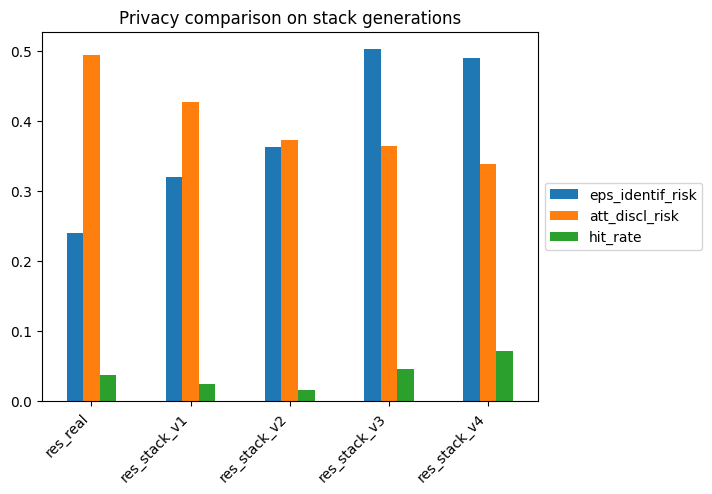

In [120]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [121]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.046979,0.180489,0.160290
res_stack_v1,0.040339,0.167797,0.172760
res_stack_v2,0.023854,0.158780,0.179076
res_stack_v3,0.020481,0.079393,0.102770
res_stack_v4,0.012366,0.077898,0.113034


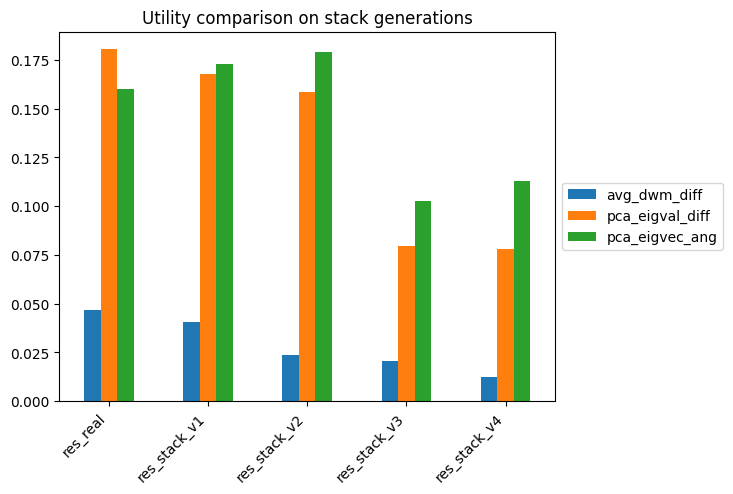

In [122]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [123]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,1.571777,0.812986
res_stack_v1,1.321994,0.468098
res_stack_v2,0.983176,0.281182
res_stack_v3,0.487515,0.183158
res_stack_v4,0.456556,0.152941


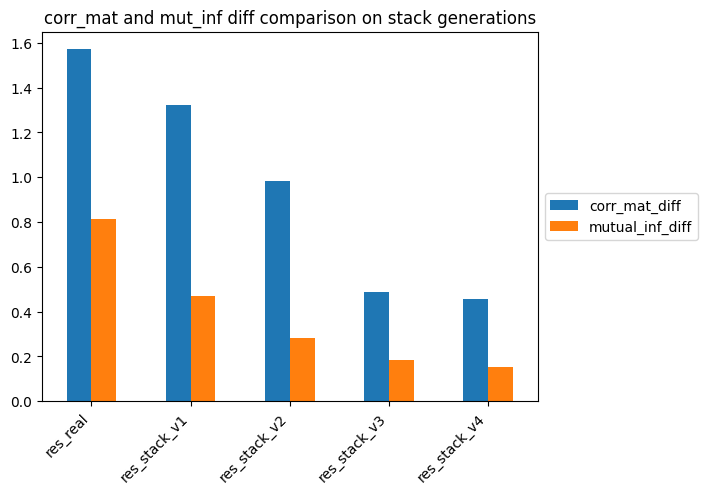

In [124]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [125]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.046979,0.180489,0.160290,0.148835,1.571777,0.812986,0.131490,0.714286,0.042801,0.011438,0.796938,0.011819,0.755523,-0.026169,0.103564,0.119403,0.037453,0.239700,0.964706,0.493584
res_stack_v1,0.040339,0.167797,0.172760,0.017033,1.321994,0.468098,0.101127,0.571429,0.030881,0.019495,0.785257,-0.001717,0.675217,0.017072,0.141805,0.070896,0.024345,0.320225,0.973134,0.427074
res_stack_v2,0.023854,0.158780,0.179076,0.000000,0.983176,0.281182,0.108295,1.000000,0.109106,0.015656,0.799872,-0.010322,0.665377,-0.017865,0.113351,0.115672,0.015918,0.362360,0.946269,0.372541
res_stack_v3,0.020481,0.079393,0.102770,0.102284,0.487515,0.183158,0.064204,0.714286,0.008847,0.004613,0.800268,0.000271,0.553354,0.031257,0.013098,0.023364,0.045391,0.502106,0.975373,0.363772
res_stack_v4,0.012366,0.077898,0.113034,0.151688,0.456556,0.152941,0.061545,1.000000,0.022589,0.002708,0.800152,-0.001379,0.563588,-0.002518,0.026959,0.026894,0.071579,0.489357,0.982056,0.338831


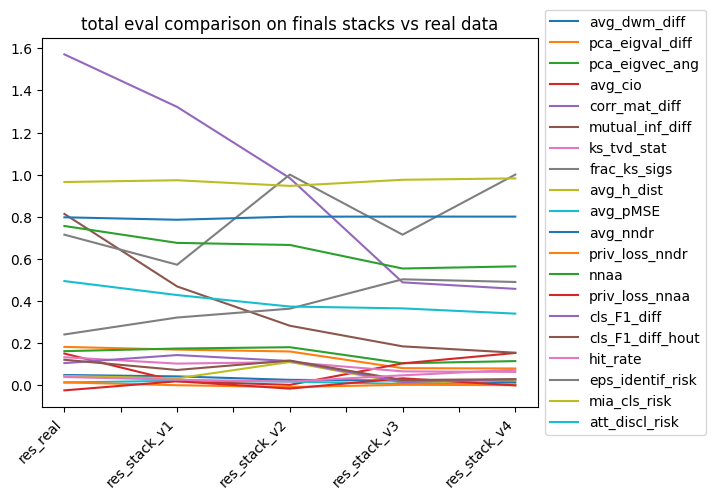

In [126]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [127]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.757228,0.749651
1,res_stack_v1,0.769179,0.748124
2,res_stack_v2,0.732749,0.748588
3,res_stack_v3,0.810935,0.709252
4,res_stack_v4,0.791078,0.714449


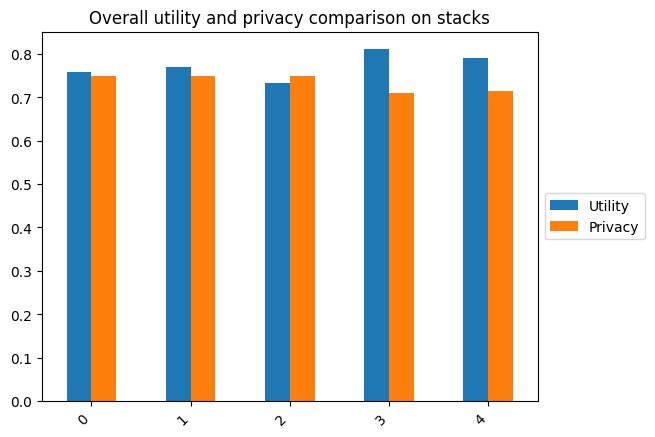

In [128]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluting final stacks compared to real data

In [129]:
eval_results = [res_real, res_stack_v5_on_real, res_stack_synth_only_on_real]
eval_str = ["res_real", "res_stack_v5_on_real", "res_stack_synth_only_on_real"]

In [130]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.239700,0.493584,0.037453
res_stack_v5_on_real,0.067416,0.332763,0.000000
res_stack_synth_only_on_real,0.044944,0.322070,0.000000


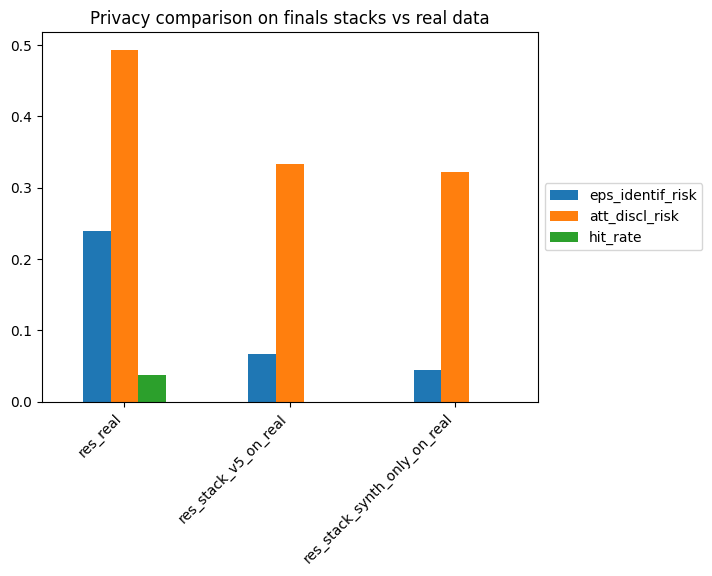

In [131]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [132]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.046979,0.180489,0.160290
res_stack_v5_on_real,0.056809,0.462987,0.446688
res_stack_synth_only_on_real,0.082825,0.436955,0.310898


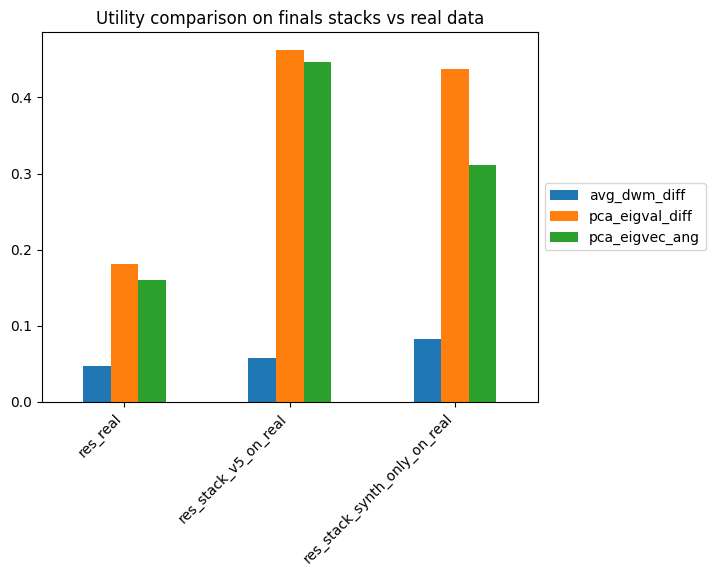

In [133]:
utility_plot.plot.bar()
plt.title("Utility comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [134]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,1.571777,0.812986
res_stack_v5_on_real,2.870552,0.932457
res_stack_synth_only_on_real,2.840373,0.949409


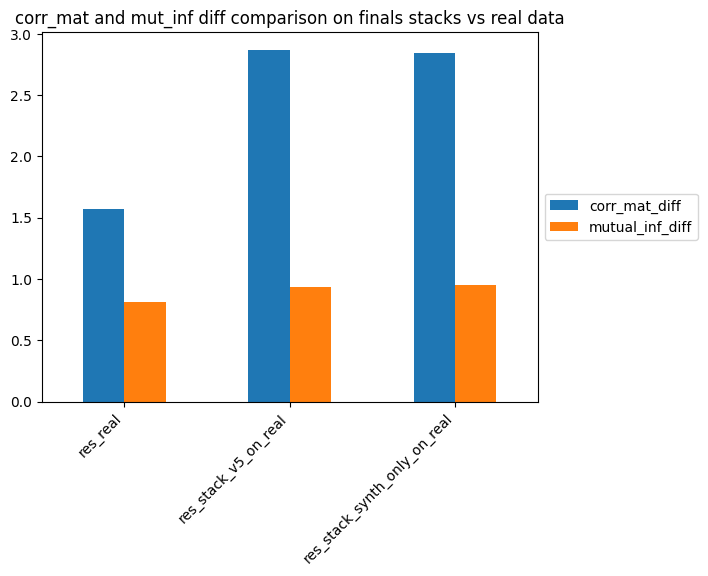

In [135]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [136]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.046979,0.180489,0.160290,0.148835,1.571777,0.812986,0.131490,0.714286,0.042801,0.011438,0.796938,0.011819,0.755523,-0.026169,0.103564,0.119403,0.037453,0.239700,0.964706,0.493584
res_stack_v5_on_real,0.056809,0.462987,0.446688,0.116240,2.870552,0.932457,0.213271,1.000000,0.066801,0.039153,0.808439,-0.025170,0.900424,-0.028036,0.337282,0.406716,0.000000,0.067416,0.782353,0.332763
res_stack_synth_only_on_real,0.082825,0.436955,0.310898,0.211959,2.840373,0.949409,0.197044,0.857143,0.043922,0.052547,0.775990,0.017106,0.910163,-0.052700,0.247292,0.317164,0.000000,0.044944,0.817647,0.322070


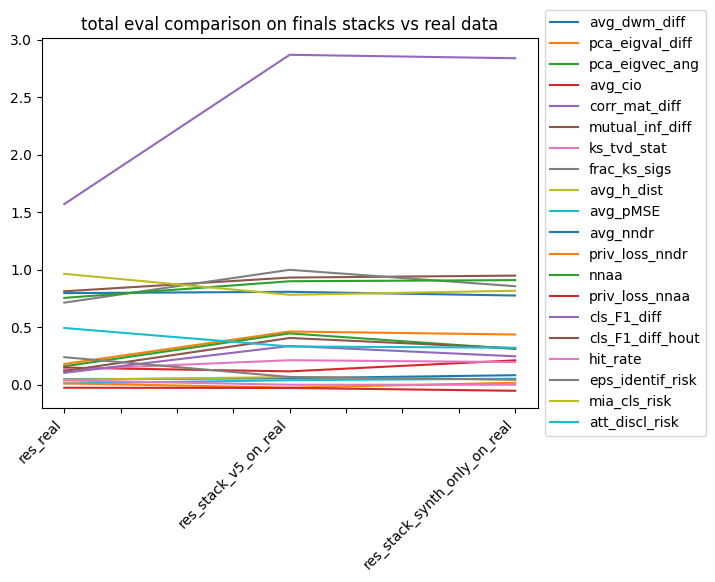

In [137]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [138]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.757228,0.749651
1,res_stack_v5_on_real,0.630158,0.821581
2,res_stack_synth_only_on_real,0.663833,0.815184


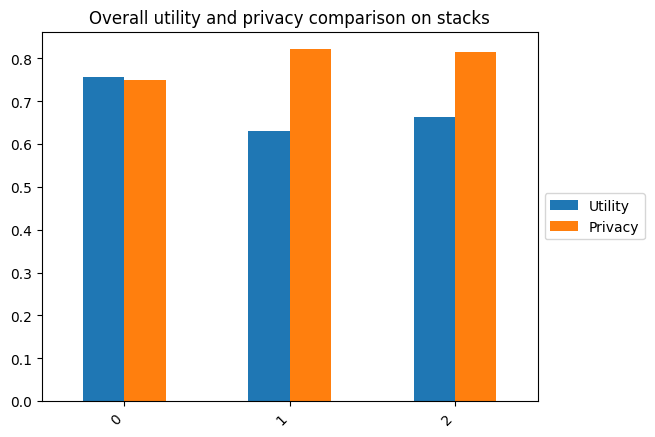

In [139]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()